## By Yogesh Yadav

### Task-6 To Implement Decision Tree Classifier on Iris Dataset 

### In this task  with Help of Decision Tree Classifier to predict the Species

In [31]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Import Dataset
url_path=r'C:\Users\yogesh yadav\Downloads\Grip\Task-6\Iris.csv'
df=pd.read_csv(url_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# To check Null Value in this Dataset
df.isnull().sum().sort_values(ascending=False)

Species          0
PetalWidthCm     0
PetalLengthCm    0
SepalWidthCm     0
SepalLengthCm    0
Id               0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### To Change Categorical Data to Numerics

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['Species'])

In [47]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### So there is No Null values in dataset

### Now Visualize data 

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


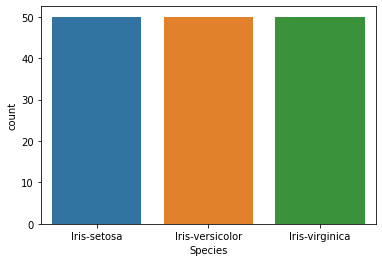

In [35]:
sns.countplot(df['Species'])
print(df['Species'].value_counts())

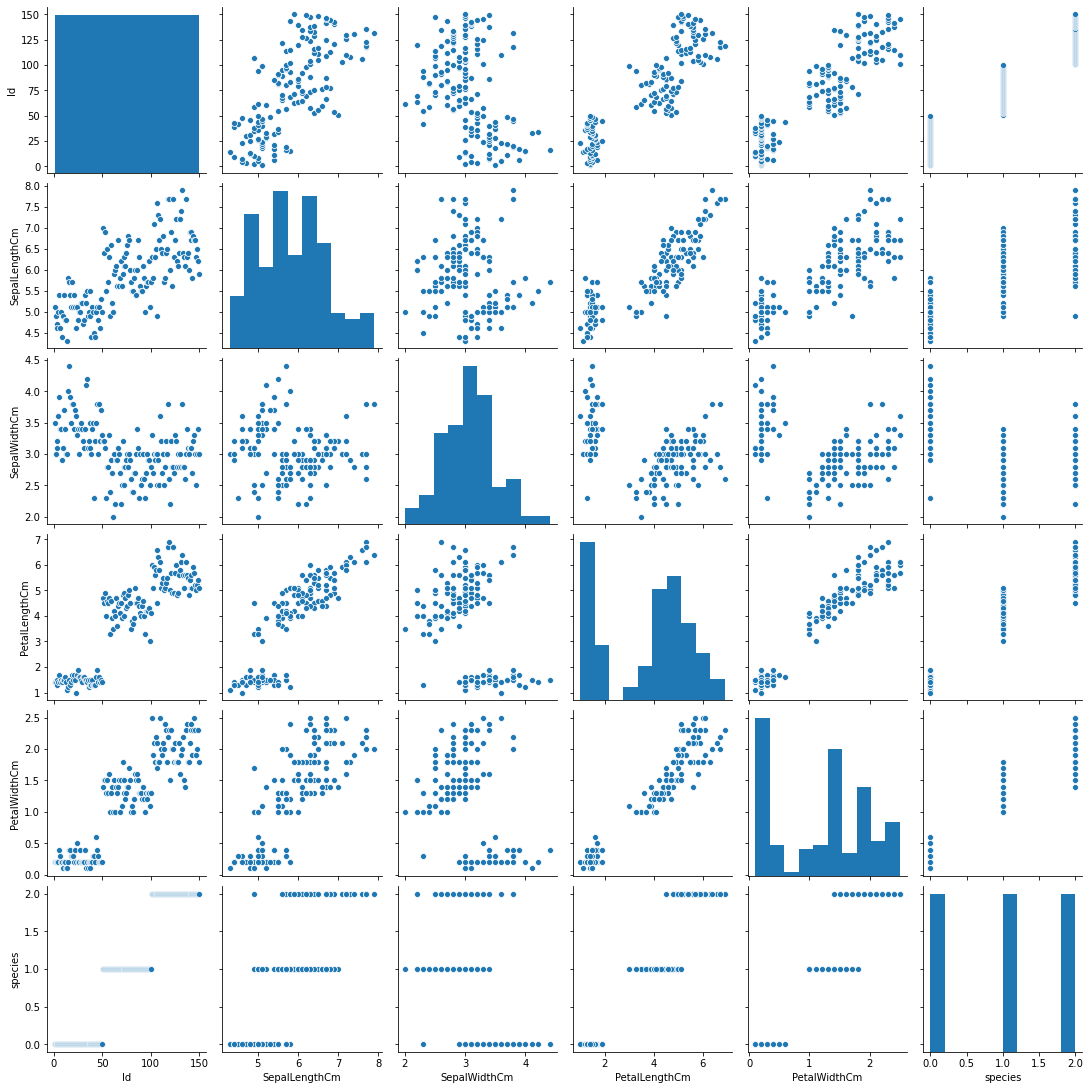

In [48]:
sns.pairplot(df)

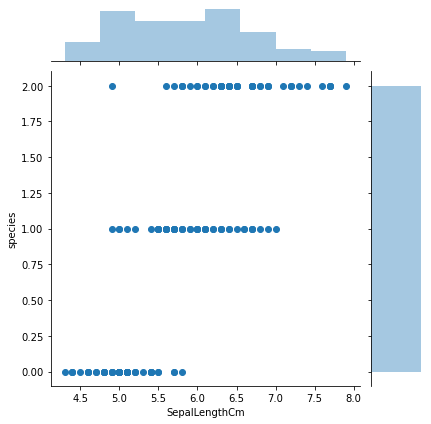

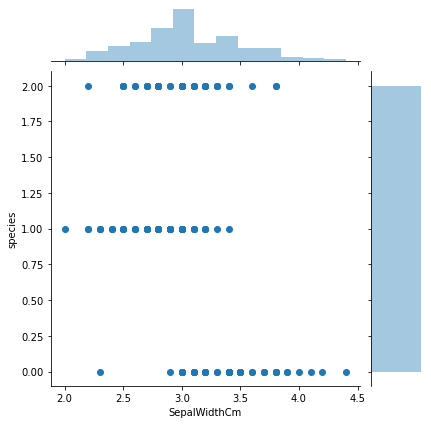

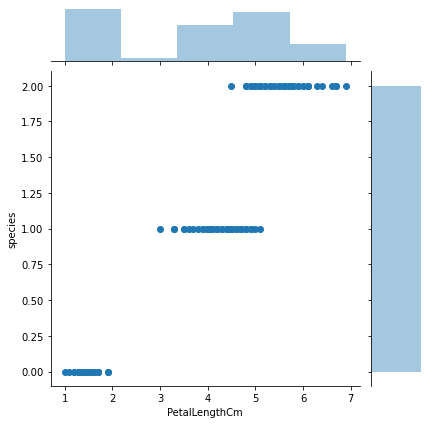

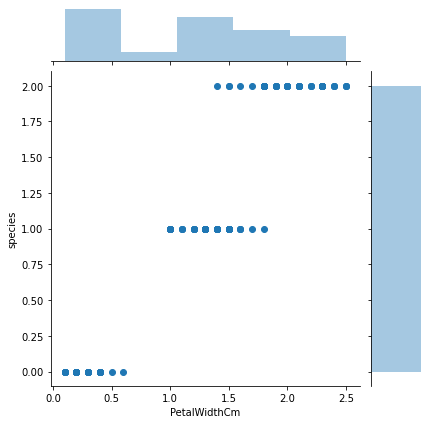

In [50]:
float_cols=list(df.select_dtypes('float64').columns)
for f in float_cols:
    sns.jointplot(x=df[f],y=df['species'],data=df)

### To Define Dependent and Independent Variable 

In [62]:
X=df.iloc[:,1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
Y=df['species']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

### Normalize Data

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### split tha data in to train and test dataset

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

## Apply Decision Tree Classifier On DataSet

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(max_depth=3)
dtr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Predict the Data

In [75]:
y_pred=dtr.predict(x_test)

### To Check Accuracy Score  of our classifier

In [83]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("Accuracy Score Test data: ",score*100)

Accuracy Score Test data:  96.66666666666667


## Visualization of  Tree 

[Text(251.10000000000002, 570.7800000000001, 'X[2] <= -0.744\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(167.4, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(334.8, 407.70000000000005, 'X[3] <= 0.725\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(167.4, 244.62, 'X[2] <= 0.677\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(83.7, 81.53999999999996, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(502.20000000000005, 244.62, 'X[2] <= 0.621\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(418.5, 81.53999999999996, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(585.9, 81.53999999999996, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

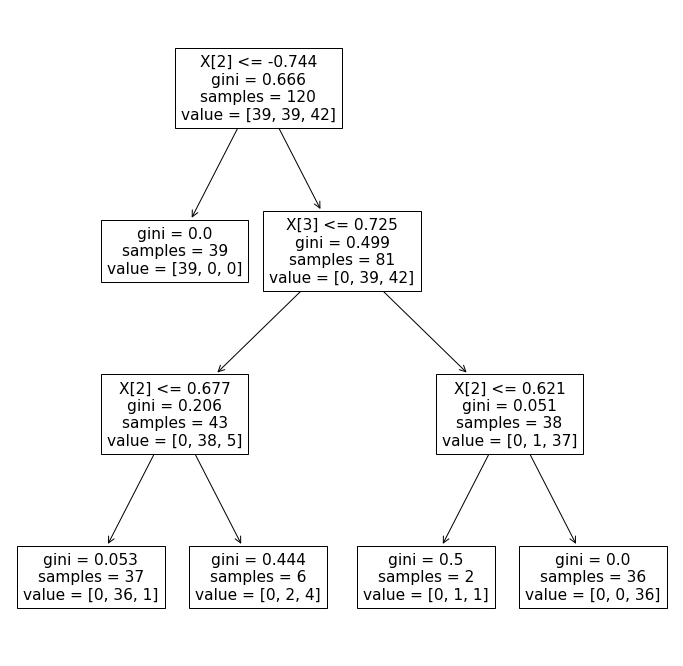

In [82]:
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(dtr)

[Text(251.10000000000002, 570.7800000000001, 'PetalLengthCm <= -0.744\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]\nclass = Verginica'),
 Text(167.4, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = stosa'),
 Text(334.8, 407.70000000000005, 'PetalWidthCm <= 0.725\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]\nclass = Verginica'),
 Text(167.4, 244.62, 'PetalLengthCm <= 0.677\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]\nclass = versicolor'),
 Text(83.7, 81.53999999999996, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Verginica'),
 Text(502.20000000000005, 244.62, 'PetalLengthCm <= 0.621\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = Verginica'),
 Text(418.5, 81.53999999999996, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(585.9, 81.53999999999996, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 3

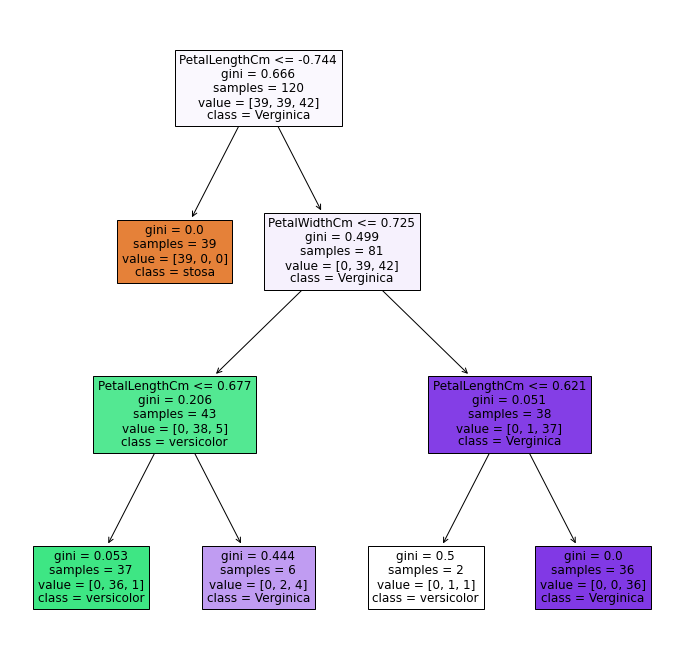

In [81]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['stosa','versicolor','Verginica']
plt.figure(figsize=(12,12))
tree.plot_tree(dtr,feature_names=fn,class_names=cn,filled=True)